In [ ]:
!pip install dlib
!pip install opencv-python

In [ ]:
!pip install face_recognition
!pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566166 sha256=c5e674978c7136aafd16c11dec8851192a72f02b0c85287736cc61ae862a75e2
  Stored in directory: /root/.cache/pip/wheels/04/52/ec/9355da79c29f160b038a20c784db2803c2f9fa2c8a462c176a
Successfully built face-recognition-models


In [ ]:
# Instalar dependencias del sistema
!apt-get install -y libboost-all-dev cmake

# Instalar dlib (compila desde fuente, toma unos minutos)
!pip install dlib

# Finalmente, instalar face_recognition
!pip install face_recognition

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libboost-all-dev is already the newest version (1.74.0.3ubuntu7).
cmake is already the newest version (3.22.1-1ubuntu1.22.04.2).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


Saving Captura desde 2025-05-03 07-42-07.png to Captura desde 2025-05-03 07-42-07.png


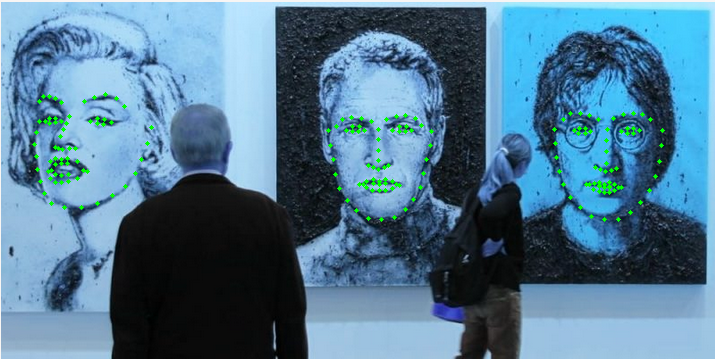

In [ ]:
import face_recognition
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files

# Subí una imagen
uploaded = files.upload()
image_path = next(iter(uploaded))

# Cargar la imagen
image = face_recognition.load_image_file(image_path)

# Detectar landmarks
face_landmarks_list = face_recognition.face_landmarks(image)

# Dibujar los puntos
for face_landmarks in face_landmarks_list:
    for facial_feature in face_landmarks.keys():
        for point in face_landmarks[facial_feature]:
            cv2.circle(image, point, 2, (0, 255, 0), -1)

# Mostrar la imagen
cv2_imshow(image)


Saving Captura desde 2025-05-03 07-42-07.png to Captura desde 2025-05-03 07-42-07 (1).png
Rostro 1: 72 puntos detectados
Rostro 2: 72 puntos detectados
Rostro 3: 72 puntos detectados


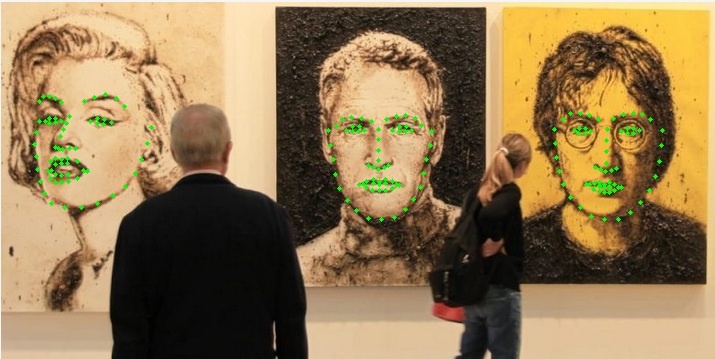

In [21]:
import face_recognition
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files

# Subí una imagen
uploaded = files.upload()
image_path = next(iter(uploaded))

# Cargar la imagen (RGB)
image = face_recognition.load_image_file(image_path)

# Detectar landmarks
face_landmarks_list = face_recognition.face_landmarks(image)

# Contar y mostrar la cantidad de puntos por rostro
for i, face_landmarks in enumerate(face_landmarks_list):
    total_points = sum(len(points) for points in face_landmarks.values())
    print(f"Rostro {i+1}: {total_points} puntos detectados")

    # Dibujar los puntos
    for facial_feature in face_landmarks.keys():
        for point in face_landmarks[facial_feature]:
            cv2.circle(image, point, 2, (0, 255, 0), -1)

# Mostrar la imagen en BGR
#cv2_imshow(image)

# Mostrar imagen en formato RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2_imshow(image_rgb)


In [10]:
import face_recognition
import cv2
from google.colab import files
import os

# Subí un video
uploaded = files.upload()
video_path = next(iter(uploaded))

# Captura de video
video_capture = cv2.VideoCapture(video_path)

# Parámetros del video de salida
width = int(video_capture.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video_capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = video_capture.get(cv2.CAP_PROP_FPS)

output_path = "output_with_landmarks.avi"
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

# Procesar frame por frame
while video_capture.isOpened():
    ret, frame = video_capture.read()
    if not ret:
        break

    # Convertir BGR a RGB
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Detectar landmarks
    face_landmarks_list = face_recognition.face_landmarks(rgb_frame)

    # Dibujar puntos
    for face_landmarks in face_landmarks_list:
        for facial_feature in face_landmarks:
            for point in face_landmarks[facial_feature]:
                cv2.circle(frame, point, 2, (0, 255, 0), -1)

    # Escribir frame en el video de salida
    out.write(frame)

# Liberar recursos
video_capture.release()
out.release()

# Descargar el video
files.download(output_path)


Saving Grabación de pantalla desde 2025-05-10 10-12-52.webm to Grabación de pantalla desde 2025-05-10 10-12-52 (2).webm


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>